# 1.多类分类

## 1.1加载数据集

使用逻辑回归来识别手写数字（0-9）.首先开始加载数据集，它是在MATLAB的本机格式，所以要加载它到python，需要使用一个SciPy工具

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from scipy.io import loadmat

In [3]:
data=loadmat('/Users/luchong/Desktop/学习技术栈/机器学习/作业数据/ex3data1.mat')
data 

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

其中X是特征数组，y是结果数组

In [4]:
data['X'].shape,data['y'].shape
type(data['X'])

numpy.ndarray

训练集中，共有5000条数据，其中X中有400个特征，分别为图片中每个像素的亮度值，y中为其对应的最终数字

## 1.2数据可视化

随机展示100个数据

In [5]:
sample_idx=np.random.choice(np.arange(data['X'].shape[0]),100)
sample_images=data['X'][sample_idx,:]
sample_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

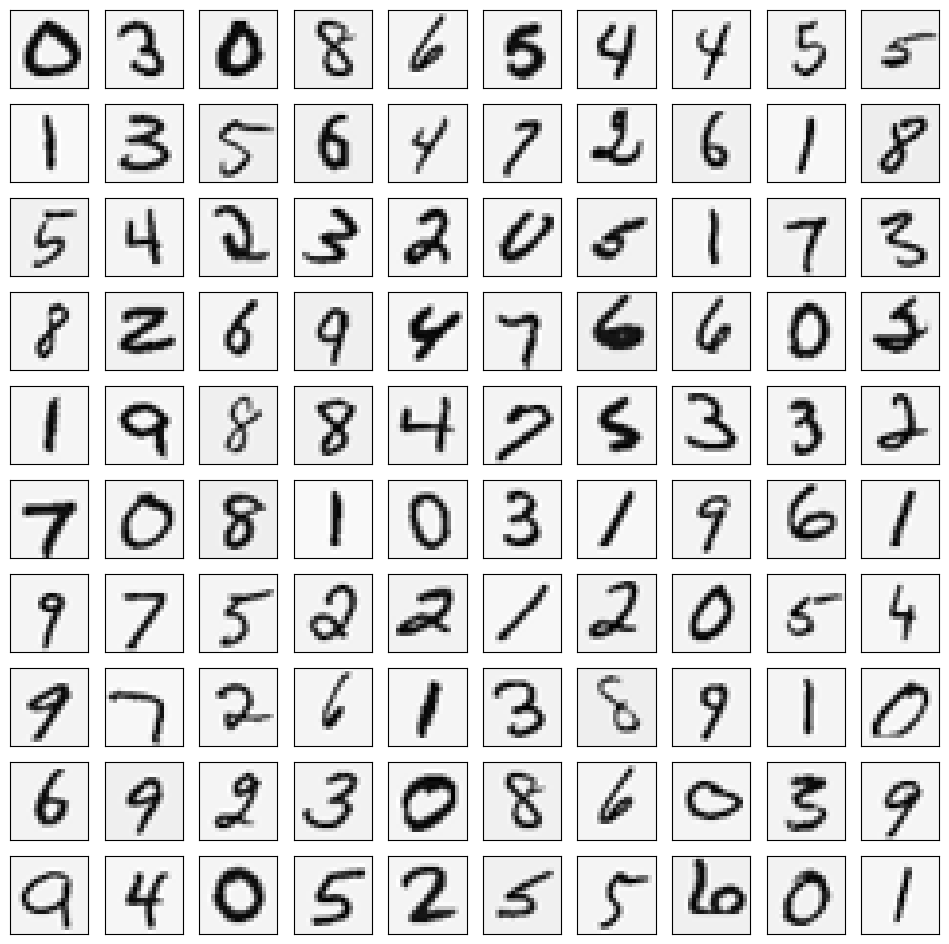

In [6]:
fig,ax_array=plt.subplots(nrows=10,ncols=10,sharey=True,sharex=True,figsize=(12,12))
for r in range(10):
    for c in range(10):
        ax_array[r,c].matshow(np.array(sample_images[10*r+c].reshape((20,20))).T,cmap=matplotlib.cm.binary)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))

## 1.3指定一个模型

In [10]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [12]:
model= Sequential([
    Dense(units=25,activation='relu'),
    Dense(units=15,activation='relu'),
    Dense(units=10,activation='softmax')
])

## 1.4指定代价和损失函数

In [13]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy())

## 1.5在训练集上训练来最小化损失函数

In [15]:
print(np.max(data['y']))
print(np.min(data['y']))

10
1


在TensorFlow中，标签的取值通常是整数形式，表示样本属于哪个类别，且类别从0开始索引。

手写数字识别问题中，共有10个类别（数字0到9），因此标签的取值应该在0到9之间，包含0，但不包含10。
所以我们应该对data['y']进行-1处理

In [16]:
y_train_minus_1 =data['y'] - 1
print(np.max(y_train_minus_1))
print(np.min(y_train_minus_1))

9
0


In [19]:
#将训练集中的最后10组数据设为测试集，不参与模型训练
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['X'], y_train_minus_1, test_size=10, shuffle=True, random_state=42)
model.fit(X_train,y_train,epochs=100) 

Epoch 1/100
156/156 [==============================] - 0s 1ms/step - loss: 2.0007e-04
Epoch 2/100
156/156 [==============================] - 0s 1ms/step - loss: 1.4329e-04
Epoch 3/100
156/156 [==============================] - 0s 1ms/step - loss: 1.3819e-04
Epoch 4/100
156/156 [==============================] - 0s 991us/step - loss: 1.6862e-04
Epoch 5/100
156/156 [==============================] - 0s 907us/step - loss: 1.4035e-04
Epoch 6/100
156/156 [==============================] - 0s 917us/step - loss: 1.0268e-04
Epoch 7/100
156/156 [==============================] - 0s 922us/step - loss: 1.0218e-04
Epoch 8/100
156/156 [==============================] - 0s 936us/step - loss: 9.2147e-05
Epoch 9/100
156/156 [==============================] - 0s 888us/step - loss: 7.6421e-05
Epoch 10/100
156/156 [==============================] - 0s 892us/step - loss: 7.6659e-05
Epoch 11/100
156/156 [==============================] - 0s 1ms/step - loss: 6.6319e-05
Epoch 12/100
156/156 [================

## 1.6随机取数进行预测

In [21]:
#先看一下测试集
X_test,y_test

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[2],
        [4],
        [4],
        [1],
        [0],
        [9],
        [0],
        [3],
        [3],
        [2]], dtype=uint8))

In [34]:
predictions = model.predict(X_test)
predicted_digits = tf.argmax(predictions, axis=1)
predicted_digits = predicted_digits.numpy() + 1
print("预测结果：", predicted_digits)
test=y_test.reshape(1,10)
print("真实标签：",test)
#其中test中的真实标签值是执行过减1操作的，所以最终的结果是全部正确的

1/1 [==============================] - 0s 17ms/step
预测结果： [ 3  5  5  2  1 10  1  4  4  3]
真实标签： [[2 4 4 1 0 9 0 3 3 2]]


# 2.针对多类分类的高级优化算法